In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import networkx as nx
import math
from scipy import linalg


Definition of the graph G_n

In [2]:
def get_vertexes(n):
    n_v = np.power(2, n + 1) + np.power(2, n) - 2
    vertexes = [i for i in range(n_v)]
    return vertexes


def build_graph(n):
    n_columns = 2 * n + 1
    columns = []
    dict_col = {}
    for i in range(n_columns):
        columns.append([])
        dict_col[i] = []
    iterator = 0
    past_center_counter = 2
    for i in range(n_columns):
        if i <= n:
            n_v_c = np.power(2, i)
            for j in range(iterator, iterator + n_v_c):
                columns[i].append(j)
                dict_col[i].append(j)
            iterator = iterator + n_v_c
        elif i > n:
            k = i - past_center_counter
            past_center_counter = past_center_counter + 2
            n_v_c = np.power(2, k)
            for j in range(iterator, iterator + n_v_c):
                columns[i].append(j)
                dict_col[i].append(j)
            iterator = iterator + n_v_c

    g = nx.Graph()
    for i in range(len(columns)):
        g.add_nodes_from(columns[i])
    for i in range(len(columns)):
        if i < n:
            for j in range(len(columns[i])):
                g.add_edge(columns[i][j], columns[i + 1][2 * j])
                g.add_edge(columns[i][j], columns[i + 1][2 * j + 1])
        if i >= n and i != 2 * n:
            for j in range(len(columns[i + 1])):
                g.add_edge(columns[i + 1][j], columns[i][2 * j])
                g.add_edge(columns[i + 1][j], columns[i][2 * j + 1])
    return [g, dict_col]

Building the Hamiltonian

In [3]:
def build_H(n):
    vertexes = get_vertexes(n)
    gamma = 1
    g = build_graph(n)[0]
    A = nx.adjacency_matrix(g).todense()
    H = A + np.identity(len(vertexes))
    for i in range(len(vertexes)):
        for j in range(len(vertexes)):
            if (i == 0 and j == 0) or (
                i == (len(vertexes) - 1) and j == (len(vertexes) - 1)
            ):
                H[i][j] = H[i][j] * 2 * gamma
            elif i == j:
                H[i][j] = H[i][j] * 3 * gamma
            elif H[i][j] != 0:
                H[i][j] = H[i][j] * (-gamma)
    return H


def modulus_c(a):
    r = a.real
    i = a.imag
    return np.sqrt(r**2 + i**2)


Function to get the probability distribution on the vertexes of G_n

In [4]:
def get_prob_distr(n, eps):
    h = build_H(n)
    initial_state = [[1]]
    for i in range(len(get_vertexes(n)) - 1):
        initial_state.append([0])
    initial_state = np.array(initial_state)
    tt_list = np.linspace(0.0, pow(n, 4) / (2 * eps), int((pow(n, 4) / (2 * eps))))
    T = random.choice(tt_list)
    t_list = np.linspace(0.0, T, int(T / 1000))
    unitary = [linalg.expm(-complex(0, 1) * j * h) for j in t_list]
    s = initial_state
    for i in unitary:
        s = i.dot(s)

    final_state = []
    for i in s:
        final_state.append(modulus_c(i[0]) * modulus_c(i[0]))
    # x = []
    dict_col = build_graph(n)[1]
    # for i in dict_col.keys():
    #    x.append(i)
    col_results = []
    for i in dict_col.keys():
        col_res = []
        for j in dict_col[i]:
            col_res.append(final_state[j])
        col_results.append(sum(col_res))
    return col_results

In [5]:
def draw_mean_prob(N, n, eps):
    x = []
    dict_col = build_graph(n)[1]
    for i in dict_col.keys():
        x.append(i)
    y_1 = []
    for i in range(N):
        y_1.append(get_prob_distr(n, eps))
    y = []
    er_y = []
    # print(len(y_1))
    # for i in y_1:
    #    print(len(i))
    for j in range(len(y_1[0])):
        y_col = []
        for i in range(len(y_1)):
            y_col.append(y_1[i][j])
        y.append(np.mean(y_col))
        er_y.append(np.std(y_col))
    fig, ax = plt.subplots()
    ax.errorbar(x, y, er_y, elinewidth=1)
    plt.xlabel("Column")
    plt.ylabel("Occurrences")
    plt.grid(linestyle="--", linewidth=0.5)
    plt.show()

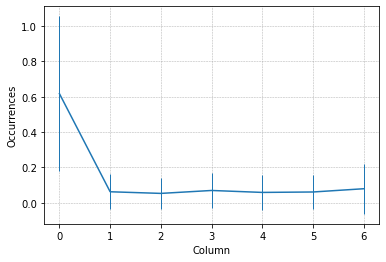

In [7]:
draw_mean_prob(100,3,0.01)